In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

C:\Users\afunn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,title,year
0,Orlando Vargas,2005
1,Niu-Peng,1989
2,Anandabhadram,2005
3,Mahendra Varma,1993
4,Beomdiga shidae,1970


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

C:\Users\afunn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [5]:
c = cast
c.head(2)

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN


In [6]:
ans1 = c[(c.character == "Superman")|(c.character == "Batman")].groupby([c.year,c.character]).size()
ans1.head(5)

year  character
1938  Batman       1
1940  Batman       1
1943  Batman       1
1948  Superman     1
1949  Batman       2
dtype: int64

In [7]:
ans1 = ans1.unstack(1).fillna(0)
ans1.head(6)

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0
1950,0.0,1.0


In [8]:
ans1a = ans1.Superman - ans1.Batman
ans1a.head()


year
1938   -1.0
1940   -1.0
1943   -1.0
1948    1.0
1949   -2.0
dtype: float64

In [9]:
ans1b = ans1a[ans1a>0]
ans1b.head()

year
1948    1.0
1950    1.0
1951    2.0
1954    5.0
1955    1.0
dtype: float64

In [12]:
print("the number of superman years is {}".format(len(ans1b)))

the number of superman years is 12


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [13]:
ans2 = ans1.Batman-ans1.Superman
len(ans2[ans2>0])

24

In [14]:
print("the number of batman years is {}".format(len(ans2[ans2>0])))

the number of batman years is 24


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [15]:
c.head(2)

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN


In [16]:
a3 = c.groupby(['type','year']).size()

In [17]:
a3 = a3.unstack(0)
a3.head()

type,actor,actress
year,,
1894,2.0,1.0
1899,6.0,NaN
1900,2.0,NaN
1905,1.0,NaN
1906,14.0,3.0


(1887.65, 2015)

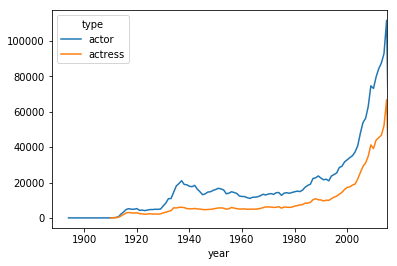

In [18]:
a3.plot().set_xlim(right=2015)

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

(1887.65, 2015)

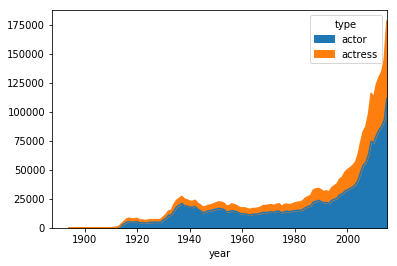

In [19]:
a3.plot(kind='area').set_xlim(right=2015)

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

(1887.7, 2015)

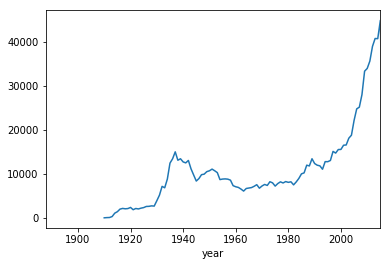

In [20]:
a5 = a3.actor-a3.actress
a5.plot().set_xlim(right=2015)

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

(0, 1)

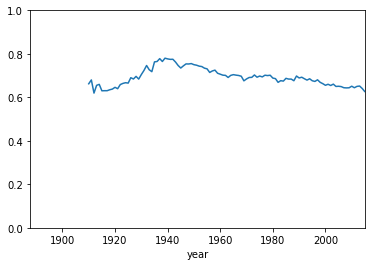

In [27]:
a6 = (a3.actor)/(a3.actor+a3.actress)
plt = a6.plot()
plt.set_xlim(right=2015)
plt.set_ylim(0,1)

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [43]:
a7 = c[(c.n == 2)].groupby(['type','year']).size()
a7.head()

type   year
actor  1899    2
       1906    2
       1907    1
       1908    2
       1910    1
dtype: int64

In [47]:
a7 = a7.unstack(0).fillna(0)
a7.head()

type   year
actor  1899    2.0
       1906    2.0
       1907    1.0
       1908    2.0
       1910    1.0
dtype: float64

In [48]:
a7a = a7['actor'] / (a7['actor'] + a7['actress'])
a7a.head()

year
1899    1.000000
1906    0.666667
1907    1.000000
1908    1.000000
1910    0.333333
dtype: float64

(1892.95, 2015)

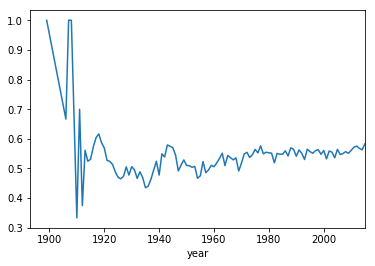

In [50]:
a7a.plot().set_xlim(right=2015)

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [53]:
a8 = c[(c.n>0) & (c.n<=3)].groupby(['type','year','n']).size()
a8.head()

type   year  n  
actor  1899  1.0    2
             2.0    2
       1906  1.0    2
             2.0    2
       1907  1.0    1
dtype: int64

In [90]:
a8a = a8.unstack(0).fillna(0).unstack(1).fillna(0)
a8a.head()

type actor           actress          
n      1.0  2.0  3.0     1.0  2.0  3.0
year                                  
1899   2.0  2.0  0.0     0.0  0.0  0.0
1906   2.0  2.0  0.0     1.0  1.0  1.0
1907   1.0  1.0  1.0     0.0  0.0  0.0
1908   1.0  2.0  2.0     0.0  0.0  0.0
1909   1.0  0.0  0.0     0.0  0.0  0.0

In [63]:
n1 = a8a[1]['actor'] / (a8a[1]['actor']+a8a[1]['actress']) #much more efficient way of doing this below !!
n2 = a8a[2]['actor'] / (a8a[2]['actor']+a8a[2]['actress'])
n3 = a8a[3]['actor'] / (a8a[3]['actor']+a8a[3]['actress'])

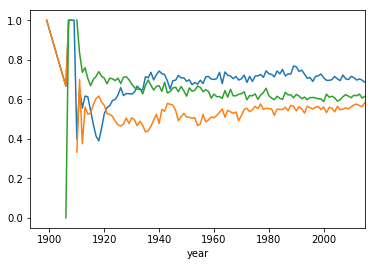

In [87]:
p1 = n1.plot().set_xlim(right=2015)
p2 = n2.plot().set_xlim(right=2015)
p3 = n3.plot().set_xlim(right=2015)

(1892.95, 2015)

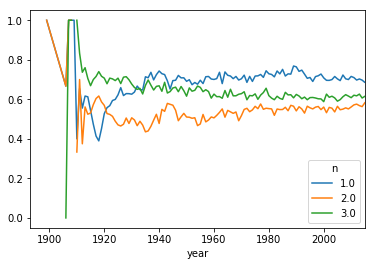

In [93]:
(a8a.actor/(a8a.actor+a8a.actress)).plot().set_xlim(right=2015)